<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce
from collections import defaultdict 

import prophet as pr

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'match_result_test.csv',
 'groceries.csv',
 'sales_vs_discount.csv',
 'online_retail.xlsx',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_order_payments_dataset.csv',
 'bz_data_analyis.csv',
 '1_orders_dataset.csv',
 'sales_data_with_stores.csv',
 'test.csv',
 'sample_data']

In [3]:
df = pd.read_csv('sales.csv')
df.head()

,id,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,1,4187,PG2,498,420.76,569.91,13,58
1,2,4195,PG2,473,545.64,712.41,16,58
2,3,4204,PG2,968,640.42,854.91,22,88
3,4,4219,PG2,241,869.69,1034.55,14,45
4,5,4718,PG2,1401,12.54,26.59,50,285


In [37]:
cnt = df.groupby(['product_group'])['stock_qty', 'last_week_sales',	'last_month_sales'].sum().reset_index()
cnt['week_ratio'] = cnt['last_week_sales']/(cnt['stock_qty'] + cnt['last_week_sales']) * 100
cnt['month_ratio'] = cnt['last_month_sales']/(cnt['stock_qty'] + cnt['last_week_sales']) * 100
cnt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,product_group,stock_qty,last_week_sales,last_month_sales,week_ratio,month_ratio
0,PG1,25766,1382,4794,5.090614,17.658759
1,PG2,160651,6133,23840,3.677211,14.293937
2,PG3,95941,3871,14929,3.878291,14.957119
3,PG4,465054,16064,56352,3.338890,11.712719
4,PG5,4545082,21343,79125,0.467390,1.732756


In [39]:
cnt2 = pd.melt(cnt[['product_group','week_ratio','month_ratio']], id_vars = ['product_group'])
cnt2

,product_group,variable,value
0,PG1,week_ratio,5.090614
1,PG2,week_ratio,3.677211
2,PG3,week_ratio,3.878291
3,PG4,week_ratio,3.338890
4,PG5,week_ratio,0.467390
5,PG6,week_ratio,3.759343
6,PG1,month_ratio,17.658759
7,PG2,month_ratio,14.293937
8,PG3,month_ratio,14.957119
9,PG4,month_ratio,11.712719


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.


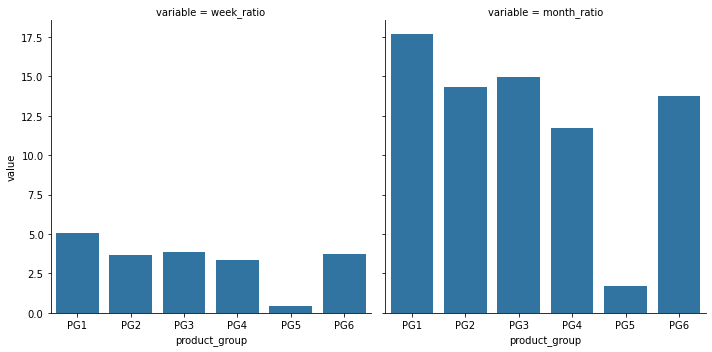

In [42]:

g = sns.FacetGrid(data = cnt2, col = 'variable', size = 5) 
g.map(sns.barplot, 'product_group', 'value')

# Iterators

In [43]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [47]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [54]:
a = (a*np.random.randint(2, 10, 1) for a in range(100))
a

<generator object <genexpr> at 0x7f9bbaeebad0>

In [55]:
for _ in range(10) :
  print(next(a)[0])

0
6
4
15
24
45
18
49
64
45


In [56]:
for _ in range(10) :
  print(next(a)[0])

40
99
36
26
98
90
80
34
126
133


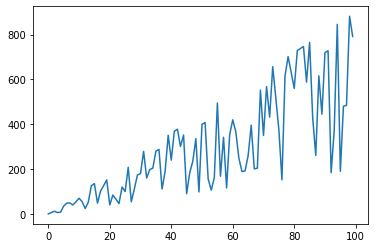

In [61]:
a = (a*np.random.randint(2, 10, 1) for a in range(100))
plt.plot(range(100), [x for x in a])